# Data Preparatio

In [40]:
import pandas as pd

In [41]:
file_path = 'Dataset/Bert_Sentimen.csv'  # <-- Path yang benar
df = pd.read_csv(file_path)
display(df.head())

,created_at,full_text,lang,cleaned_text,normalized_text,dominant_topic,sentiment_pred
0,2025-10-21,@salam4jari Mentri gagal mentri ESDM yg merusa...,in,mentri gagal mentri esdm yg merusak sdm itu se...,menteri gagal menteri esdm yang merusak sdm it...,1,Negatif
1,2025-10-20,@feroferraferri Cuman mediator atau bahasa ker...,in,cuman mediator atau bahasa kerennya calo masa ...,cuman mediator atau bahasa kerennya calo masa ...,1,Negatif
2,2025-10-19,mentri sdm yang bener cuman kak imel doang anjjj,in,mentri sdm yang bener cuman kak imel doang anjjj,menteri sdm yang bener cuman kak imel doang anjjj,2,Negatif
3,2025-10-18,@DS_yantie Mentri sdm kok gk punya otak,in,mentri sdm kok gk punya otak,menteri sdm kok gak punya otak,1,Negatif
4,2025-10-18,@somexthread Kitab suci dihina cuma bisa nyuru...,in,kitab suci dihina cuma bisa nyuruh sabar kader...,kitab suci dihina cuma bisa nyuruh sabar kader...,1,Negatif


In [42]:
# ...
# Hapus URL
df['normalized_text'] = df['normalized_text'].str.replace(r'http\S+|www\S+', '', regex=True)
# TAMBAHKAN INI: Hapus artefak HTML
df['normalized_text'] = df['normalized_text'].str.replace(r'&amp;', ' ', regex=True)
# Hapus Mention
df['normalized_text'] = df['normalized_text'].str.replace(r'@\w+', '', regex=True)
# ...

In [43]:
df_filter = df[['created_at', 'normalized_text', 'sentiment_pred']]
display(df_filter.tail())

,created_at,normalized_text,sentiment_pred
5678,2024-10-24,meme bahlil pokoknya gue retweet terus sampe d...,Negatif
5679,2024-10-24,meme bahlil lucu smua,Positif
5680,2024-10-24,wkwkwk luculucu banget wey meme bahlil,Positif
5681,2024-10-24,bahlil ini mukanya mirip meme apa ya gak asing,Negatif
5682,2024-10-24,full meme kalau ada bahlil tu haha,Netral


In [44]:
df_filter['created_at'] = pd.to_datetime(df_filter['created_at'])

start_date = '2025-01-01'
end_date = '2025-12-31'

df_fix = df_filter[(df_filter['created_at'] >= start_date) & (df_filter['created_at'] <= end_date)]

display(df_fix.head())

C:\Users\faiqa\AppData\Local\Temp\ipykernel_11800\3189792891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['created_at'] = pd.to_datetime(df_filter['created_at'])


,created_at,normalized_text,sentiment_pred
0,2025-10-21,menteri gagal menteri esdm yang merusak sdm it...,Negatif
1,2025-10-20,cuman mediator atau bahasa kerennya calo masa ...,Negatif
2,2025-10-19,menteri sdm yang bener cuman kak imel doang anjjj,Negatif
3,2025-10-18,menteri sdm kok gak punya otak,Negatif
4,2025-10-18,kitab suci dihina cuma bisa nyuruh sabar kader...,Negatif


In [45]:
df_fix.tail()

,created_at,normalized_text,sentiment_pred
5641,2025-03-23,emg cherry picking coba ada gak yang belain ka...,Negatif
5642,2025-03-23,dri dulu aku selalu bingung kenapa sih orangor...,Negatif
5643,2025-03-22,send meme bahlil ke dia nder,Netral
5644,2025-03-21,karna kamu kasih meme bahlil mari kita mutualan,Netral
5645,2025-03-15,meme tentang bahlil kocak semua yak,Netral


In [46]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5494 entries, 0 to 5645
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   created_at       5494 non-null   datetime64[ns]
 1   normalized_text  5494 non-null   object        
 2   sentiment_pred   5494 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 171.7+ KB


# Data Preprocessing

## Stopwords Removal

In [47]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import time

factory_stopword = StopWordRemoverFactory()
stopwords_sastrawi = factory_stopword.get_stop_words()

In [48]:
custom_stopwords = [
    'bpk', 'nya', 'yg',
    'rt', 'aja', 'saja', 'di', 'ke', 'dari', 'dan', 'ini', 'itu',
    'sih', 'kok', 'deh', 'ya', 'gak', 'ga', 'enggak', 'tidak',
    'juga', 'ada', 'sih', 'aja', 'udh', 'sm', 'utk', 'jg', 'krn',
    'jd', 'dgn', 'tp', 'tapi', 'yang', 'untuk', 'pada', 'dengan',
    'karena', 'adalah', 'oleh', 'sebagai', 'akan', 'jika', 'src',
    'com', 'www', 'twitter', 'pic', 'http', 'https', 'mentri', 'jadi', 'sama', 'si', 'udah', 'kalo', 'mau', 'kalau', 'banget', 'semua', 'jelek', 'lu', 'orang', 'lebih', 'amp', 'pas', 'prabowo', 'kode', 'diskon', 'referral', 'shopeepay', 'dg', 'freelance', 'saldo', 'upgrade', 'cara', 'receh', 'masukin', 'shopee', 'muka', 'bikin', 'buat', 'aku', 'gue', 'bukan', 'masuk'
]
set_all_stopwords = set(stopwords_sastrawi + custom_stopwords)
print(f"Total {len(set_all_stopwords)} stopwords (default + custom) digunakan.")

Total 185 stopwords (default + custom) digunakan.


In [49]:
start_time_stopword = time.time()
list_hasil_stopword = []
for text in df_fix['normalized_text']:
    # Cek jika teks adalah string, jika tidak (misal float NaN), jadikan string kosong
    if not isinstance(text, str):
        list_hasil_stopword.append("")
        continue

    words = text.split()
    words_filtered = [word for word in words if word not in set_all_stopwords]
    list_hasil_stopword.append(" ".join(words_filtered))

df_fix['text_stopremoved'] = list_hasil_stopword

end_time_stopword = time.time()
print(f"Selesai Stopword Removal. Waktu: {end_time_stopword - start_time_stopword:.2f} detik")
print("Contoh hasil stopword removal:")
print(df_fix[['normalized_text', 'text_stopremoved']].head())

Selesai Stopword Removal. Waktu: 0.04 detik
Contoh hasil stopword removal:
                                     normalized_text  \
0  menteri gagal menteri esdm yang merusak sdm it...   
1  cuman mediator atau bahasa kerennya calo masa ...   
2  menteri sdm yang bener cuman kak imel doang anjjj   
3                     menteri sdm kok gak punya otak   
4  kitab suci dihina cuma bisa nyuruh sabar kader...   

                                    text_stopremoved  
0     menteri gagal menteri esdm merusak sdm sendiri  
1  cuman mediator bahasa kerennya calo masa mente...  
2       menteri sdm bener cuman kak imel doang anjjj  
3                             menteri sdm punya otak  
4  kitab suci dihina cuma nyuruh sabar kader ment...  


C:\Users\faiqa\AppData\Local\Temp\ipykernel_11800\1298529469.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix['text_stopremoved'] = list_hasil_stopword


In [50]:
df_fix.head()

,created_at,normalized_text,sentiment_pred,text_stopremoved
0,2025-10-21,menteri gagal menteri esdm yang merusak sdm it...,Negatif,menteri gagal menteri esdm merusak sdm sendiri
1,2025-10-20,cuman mediator atau bahasa kerennya calo masa ...,Negatif,cuman mediator bahasa kerennya calo masa mente...
2,2025-10-19,menteri sdm yang bener cuman kak imel doang anjjj,Negatif,menteri sdm bener cuman kak imel doang anjjj
3,2025-10-18,menteri sdm kok gak punya otak,Negatif,menteri sdm punya otak
4,2025-10-18,kitab suci dihina cuma bisa nyuruh sabar kader...,Negatif,kitab suci dihina cuma nyuruh sabar kader ment...


## Stemming


In [51]:
!pip install tqdm


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
!pip install --upgrade jupyter ipywidgets


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
df_filtered = df_fix[['created_at', 'text_stopremoved', 'sentiment_pred']]
display(df_filtered.head())

,created_at,text_stopremoved,sentiment_pred
0,2025-10-21,menteri gagal menteri esdm merusak sdm sendiri,Negatif
1,2025-10-20,cuman mediator bahasa kerennya calo masa mente...,Negatif
2,2025-10-19,menteri sdm bener cuman kak imel doang anjjj,Negatif
3,2025-10-18,menteri sdm punya otak,Negatif
4,2025-10-18,kitab suci dihina cuma nyuruh sabar kader ment...,Negatif


In [54]:
import time
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm.notebook import tqdm

In [55]:
start_time_stem = time.time()
factory_stemmer = StemmerFactory()
stemmer = factory_stemmer.create_stemmer()

In [56]:
# --- 2. BUAT LIST KOSONGNYA DI SINI ---
list_hasil_stemming = []

# --- 3. Proses Stemming (dengan Progress Bar) ---
print("Memulai proses stemming... (Perhatikan progress bar di bawah)")
start_time = time.time()  # Anda punya start_time dan start_time_stem, pastikan konsisten

# Kita "bungkus" df_filtered['text_stopremoved'] dengan tqdm()
# Ini akan secara otomatis membuat progress bar
for text in tqdm(df_filtered['text_stopremoved']):
    hasil_stem = stemmer.stem(text)  # Pastikan pakai .text() bukan .stem() untuk Sastrawi
    list_hasil_stemming.append(hasil_stem)

end_time_stem = time.time()
df_filtered['text_stemmed'] = list_hasil_stemming

# Gunakan variabel waktu yang konsisten
# print(f"Selesai Stemming. Waktu: {end_time_stem - start_time:.2f} detik")
print(f"Selesai Stemming. Waktu: {end_time_stem - start_time_stem:.2f} detik")
print("Contoh hasil stemming:")
print(df_filtered[['text_stopremoved', 'text_stemmed']].head())

Memulai proses stemming... (Perhatikan progress bar di bawah)


  0%|          | 0/5494 [00:00<?, ?it/s]

Selesai Stemming. Waktu: 520.70 detik
Contoh hasil stemming:
                                    text_stopremoved  \
0     menteri gagal menteri esdm merusak sdm sendiri   
1  cuman mediator bahasa kerennya calo masa mente...   
2       menteri sdm bener cuman kak imel doang anjjj   
3                             menteri sdm punya otak   
4  kitab suci dihina cuma nyuruh sabar kader ment...   

                                        text_stemmed  
0       menteri gagal menteri esdm rusak sdm sendiri  
1  cuman mediator bahasa keren calo masa menteri ...  
2       menteri sdm bener cuman kak imel doang anjjj  
3                             menteri sdm punya otak  
4  kitab suci hina cuma nyuruh sabar kader menter...  


## Vectorization

In [57]:
data_bersih = df_filtered['text_stemmed'].dropna().drop_duplicates()

In [58]:
if data_bersih.empty:
    print("Tidak ada data tersisa setelah cleaning. Proses dihentikan.")
else:
    # Inisialisasi CountVectorizer
    # max_df = 0.95 -> abaikan kata yang muncul di > 95% dokumen
    # min_df = 5     -> abaikan kata yang muncul di < 5 dokumen (filter noise)
    # max_features = 1000 -> ambil 1000 kata paling frekuen
    vectorizer = CountVectorizer(max_df=0.85, min_df=10, max_features=1000)

    print("Melakukan fit_transform pada data bersih...")
    dtm = vectorizer.fit_transform(data_bersih)

    # Dapatkan nama-nama fitur (kata)
    nama_fitur = vectorizer.get_feature_names_out()

    print(f"Ukuran DTM: {dtm.shape} (Dokumen: {dtm.shape[0]}, Kata Unik: {dtm.shape[1]})")
    print(f"Contoh 10 fitur: {nama_fitur[:10]}")

Melakukan fit_transform pada data bersih...
Ukuran DTM: (4935, 826) (Dokumen: 4935, Kata Unik: 826)
Contoh 10 fitur: ['abis' 'ada' 'adil' 'adu' 'affiliate' 'agama' 'ah' 'ai' 'aj' 'ajak']


## LDA

In [59]:
# Cek apakah DTM berhasil dibuat
if 'dtm' in locals():
    # Tentukan jumlah topik (sesuai rumusan masalah Anda)
    # Anda punya 3 isu: LPG, Raja Ampat, Meme.
    # Jadi, 3 topik adalah titik awal yang sangat baik.
    jumlah_topik = 3

    print(f"Melatih LDA dengan {jumlah_topik} topik...")

    # Inisialisasi model LDA
    lda = LatentDirichletAllocation(
        n_components=jumlah_topik,
        learning_method='online', # 'online' sering lebih cepat
        random_state=42,          # Untuk hasil yang konsisten
        n_jobs=-1                 # Gunakan semua core CPU
    )

    # Latih model
    lda.fit(dtm)

    print("Pelatihan LDA selesai.")
else:
    print("DTM tidak ditemukan. Pastikan langkah 3 berhasil dan data Anda tidak kosong.")

Melatih LDA dengan 3 topik...
Pelatihan LDA selesai.


In [60]:
# Cek apakah model LDA sudah dilatih
if 'lda' in locals() and 'nama_fitur' in locals():
    # Tentukan berapa kata per topik yang ingin ditampilkan
    jumlah_kata_per_topik = 15

    print(f"Menampilkan Top {jumlah_kata_per_topik} Kata untuk Setiap Topik:")

    # Loop untuk setiap topik
    for index_topik, dist_kata in enumerate(lda.components_):
        print(f"\n--- Topik #{index_topik + 1} ---")

        # Ambil index kata-kata dengan probabilitas tertinggi
        # .argsort()[-N:][::-1] -> ambil N index terbesar
        index_kata_teratas = dist_kata.argsort()[-jumlah_kata_per_topik:][::-1]

        # Ambil nama kata dari index
        kata_kata_teratas = [nama_fitur[i] for i in index_kata_teratas]

        print(kata_kata_teratas)
        print(" ".join(kata_kata_teratas)) # Tampilkan sebagai string juga

else:
    print("Model LDA atau Nama Fitur tidak ditemukan. Pastikan langkah 3 & 4 berhasil.")

print("\n--- Proses LDA Selesai ---")

Menampilkan Top 15 Kata untuk Setiap Topik:

--- Topik #1 ---
['meme', 'menteri', 'golkar', 'lapor', 'lahadalia', 'pak', 'buat', 'partai', 'hina', 'polisi', 'isi', 'akun', 'kerja', 'baik', 'ketua']
meme menteri golkar lapor lahadalia pak buat partai hina polisi isi akun kerja baik ketua

--- Topik #2 ---
['meme', 'penjara', 'apa', 'kamu', 'kaya', 'lucu', 'menteri', 'repost', 'suka', 'soal', 'punya', 'cuma', 'kayak', 'indonesia', 'foto']
meme penjara apa kamu kaya lucu menteri repost suka soal punya cuma kayak indonesia foto

--- Topik #3 ---
['gw', 'liat', 'akun', 'plus', 'job', 'cara', 'login', 'install', 'spay', 'ffjwvwp', 'zonauang', 'apk', 'gibran', 'kek', 'jokowi']
gw liat akun plus job cara login install spay ffjwvwp zonauang apk gibran kek jokowi

--- Proses LDA Selesai ---


In [61]:
import joblib
import numpy as np

print("\n--- 6. Menyimpan Hasil Model, Vektor, dan Data ---")

if 'lda' in locals() and 'dtm' in locals() and 'vectorizer' in locals() and 'df_filtered' in locals():

    # 1. Simpan Model LDA
    joblib.dump(lda, 'lda_model.joblib')
    print("Model LDA disimpan ke 'lda_model.joblib'")

    # 2. Simpan DTM
    joblib.dump(dtm, 'dtm_matrix.joblib')
    print("DTM disimpan ke 'dtm_matrix.joblib'")

    # 3. Simpan Vectorizer (PENTING untuk pyLDAvis)
    joblib.dump(vectorizer, 'lda_vectorizer.joblib')
    print("Vectorizer disimpan ke 'lda_vectorizer.joblib'")

    # 4. Simpan DataFrame dengan Asumsi Topik
    #    Kita perlu memetakan hasil DTM kembali ke df_lda

    # Dapatkan distribusi topik untuk setiap dokumen di DTM
    distribusi_topik = lda.transform(dtm)
    # Dapatkan topik dominan (nomor topik) untuk setiap dokumen
    topik_dominan_per_dokumen = np.argmax(distribusi_topik, axis=1)

    # 'data_bersih' dibuat dari 'df_lda['text_stemmed'].dropna().drop_duplicates()'
    # Kita ambil indeksnya untuk memetakan kembali
    indeks_data_bersih = data_bersih.index

    # Buat DataFrame sementara dari hasil LDA
    df_hasil_lda = pd.DataFrame({
        'topic': topik_dominan_per_dokumen
    }, index=indeks_data_bersih)

    # Gabungkan kembali ke DataFrame asli 'df_lda'
    df_lda_final = df_filtered.merge(df_hasil_lda[['topic']], left_index=True, right_index=True, how='left')

    # Simpan DataFrame final ini
    df_lda_final.to_csv('Data_LDA_Hasil.csv', index=False)
    print("Data hasil (dengan tanggal & topik) disimpan ke 'Data_LDA_Hasil.csv'")

else:
    print("Gagal menyimpan file. Pastikan 'lda', 'dtm', 'vectorizer', dan 'df_lda' ada.")

print("\n--- Proses LDA Selesai (Termasuk Penyimpanan) ---")


--- 6. Menyimpan Hasil Model, Vektor, dan Data ---
Model LDA disimpan ke 'lda_model.joblib'
DTM disimpan ke 'dtm_matrix.joblib'
Vectorizer disimpan ke 'lda_vectorizer.joblib'
Data hasil (dengan tanggal & topik) disimpan ke 'Data_LDA_Hasil.csv'

--- Proses LDA Selesai (Termasuk Penyimpanan) ---


In [62]:
import pandas as pd
import joblib

print("Memuat model dan data yang sudah disimpan...")

# 1. Muat model, dtm, dan vectorizer
# Kita muat ke nama variabel yang sama persis seperti yang dicek kode Anda
lda = joblib.load('lda_model.joblib')
dtm = joblib.load('dtm_matrix.joblib')
vectorizer = joblib.load('lda_vectorizer.joblib')

# 2. Muat ulang 'data_bersih'
# Kita buat ulang dari file CSV yang sudah jadi
df_hasil = pd.read_csv('Data_LDA_Hasil.csv')
data_bersih = df_hasil['text_stemmed'].dropna().drop_duplicates()

print("Selesai! Variabel lda, dtm, vectorizer, dan data_bersih sekarang ada di memori.")
print(f"Total data bersih: {len(data_bersih)} baris.")

Memuat model dan data yang sudah disimpan...
Selesai! Variabel lda, dtm, vectorizer, dan data_bersih sekarang ada di memori.
Total data bersih: 4935 baris.


In [63]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import numpy as np

print("--- Memulai Skrip Evaluasi Koherensi Topik ---")

# Pastikan lda, dtm, vectorizer, dan data_bersih tersedia
if 'lda' not in locals() or 'dtm' not in locals() or 'vectorizer' not in locals() or 'data_bersih' not in locals():
    print("ERROR: Model LDA, DTM, Vectorizer, atau data_bersih tidak ditemukan.")
    print("Pastikan langkah-langkah sebelumnya (Vectorization dan LDA Training) telah berhasil dijalankan.")
else:
    # 1. Persiapan data untuk Gensim
    # Dapatkan nama fitur (kata-kata unik) dari CountVectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Untuk perhitungan coherence, gensim CoherenceModel juga dapat menerima teks tokenized asli
    # data_bersih adalah Series dari text_stemmed. Kita perlu mengubahnya ke list of list of words.
    texts = [text.split() for text in data_bersih if isinstance(text, str)]

    # Re-create id2word and corpus properly for gensim from tokenized texts
    # This is more robust than creating id2word from feature_names alone
    gensim_dictionary = Dictionary(texts)
    # The corpus is needed for coherence calculation, using doc2bow for each text
    gensim_corpus = [gensim_dictionary.doc2bow(text) for text in texts]

    # 2. Dapatkan topik dari model LDA Scikit-learn
    # lda.components_ adalah matriks probabilitas kata per topik (n_components x n_features)
    # Kita perlu mengkonversinya menjadi format yang diharapkan oleh Gensim CoherenceModel

    # Convert scikit-learn LDA topics to Gensim-like format (list of lists of words)
    sklearn_topics_words = []
    for topic_idx, topic in enumerate(lda.components_):
        top_words_indices = topic.argsort()[-50:][::-1] # Ambil top N kata
        # Extract only the words, not the (word, probability) pairs
        topic_words = [feature_names[i] for i in top_words_indices]
        sklearn_topics_words.append(topic_words)


    # 3. Hitung Koherensi Topik (menggunakan metode CV)
    # Pastikan gensim_dictionary dan gensim_corpus terdefinisi dengan baik
    if gensim_dictionary and gensim_corpus and sklearn_topics_words:
        coherence_model_lda = CoherenceModel(topics=sklearn_topics_words,
                                             texts=texts, # Gunakan teks asli yang sudah dipreproses
                                             dictionary=gensim_dictionary,
                                             coherence='c_v') # Corrected 'cv' to 'c_v'

        coherence_lda = coherence_model_lda.get_coherence()

        print(f"\nSkor Koherensi Topik (menggunakan metrik 'c_v'): {coherence_lda:.4f}")
        print("\n--- Skrip Evaluasi Koherensi Topik Selesai ---")
    else:
        print("ERROR: Gagal membuat dictionary atau corpus Gensim. Periksa data_bersih.")

--- Memulai Skrip Evaluasi Koherensi Topik ---

Skor Koherensi Topik (menggunakan metrik 'c_v'): 0.4441

--- Skrip Evaluasi Koherensi Topik Selesai ---


# Visualisasi

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings

In [65]:
print("--- Memulai Skrip Visualisasi LDA ---")
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set(style="whitegrid")

--- Memulai Skrip Visualisasi LDA ---


In [66]:
try:
    # Muat model, dtm, dan vectorizer
    lda_model = joblib.load('lda_model.joblib')
    dtm = joblib.load('dtm_matrix.joblib')
    vectorizer = joblib.load('lda_vectorizer.joblib')

    # Muat DataFrame hasil
    df_hasil = pd.read_csv('Data_LDA_Hasil.csv')

    # Dapatkan nama fitur dari vectorizer
    nama_fitur = vectorizer.get_feature_names_out()

    print("Berhasil memuat:")
    print(f"  - Model LDA (Topik: {lda_model.n_components})")
    print(f"  - DTM (Ukuran: {dtm.shape})")
    print(f"  - Vectorizer (Fitur: {len(nama_fitur)})")
    print(f"  - Data Hasil (Baris: {len(df_hasil)})")

except FileNotFoundError:
    print("ERROR: File .joblib atau .csv tidak ditemukan.")
    print("Pastikan Anda sudah menjalankan 'coba_lda.py' yang dimodifikasi terlebih dahulu.")
    exit()

Berhasil memuat:
  - Model LDA (Topik: 3)
  - DTM (Ukuran: (4935, 826))
  - Vectorizer (Fitur: 826)
  - Data Hasil (Baris: 5494)


## TopN Words

Plot disimpan ke: Topik_1_bar_chart.png


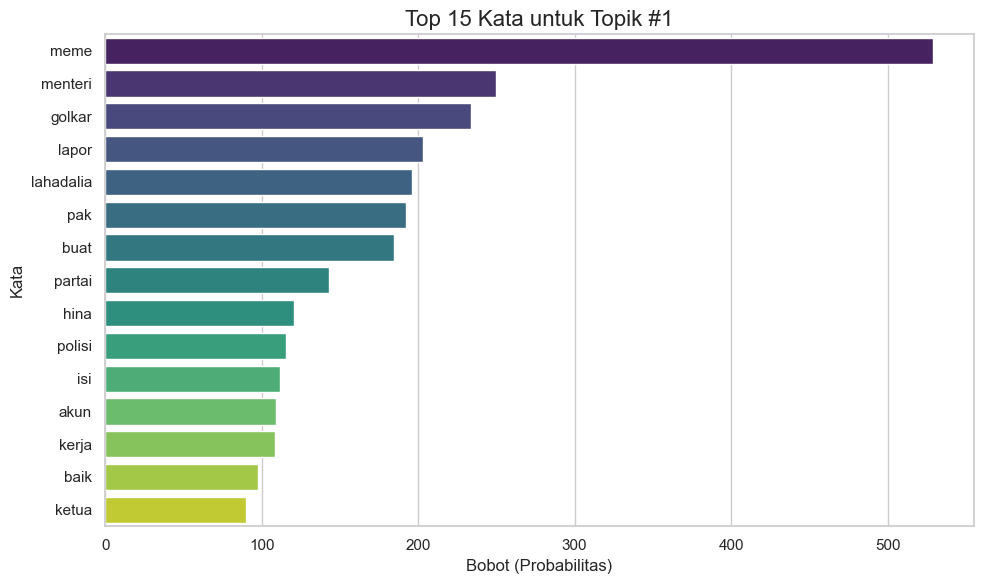

Plot disimpan ke: Topik_2_bar_chart.png


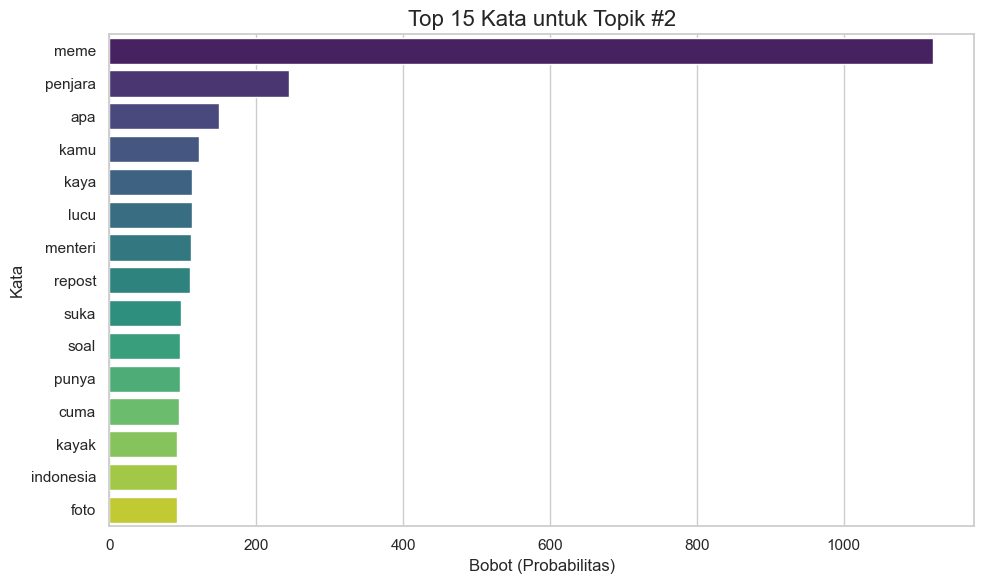

Plot disimpan ke: Topik_3_bar_chart.png


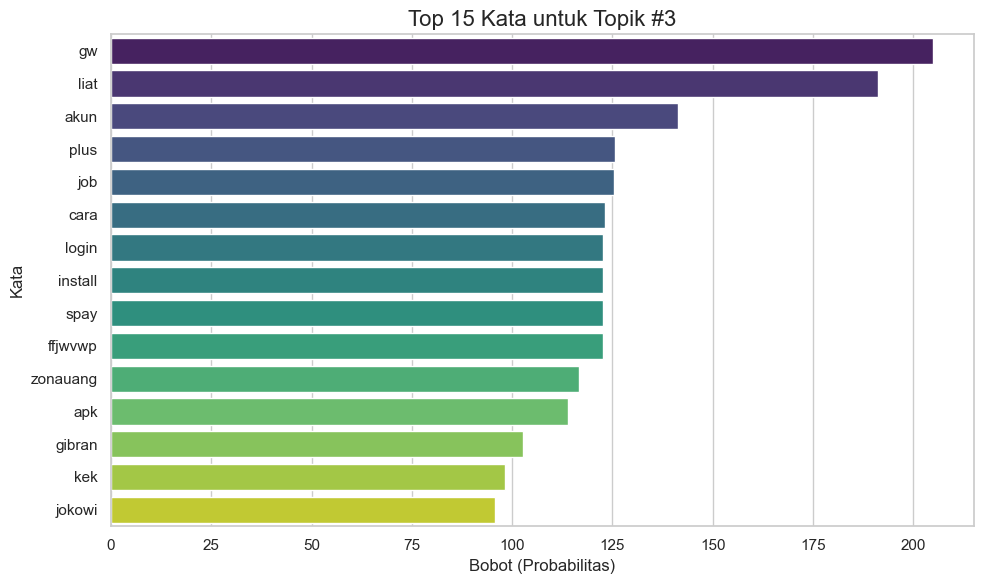

In [67]:
jumlah_kata_teratas = 15

# Loop untuk setiap topik
for index_topik, dist_kata in enumerate(lda_model.components_):

    # Ambil index kata-kata dengan probabilitas tertinggi
    index_kata_teratas = dist_kata.argsort()[-jumlah_kata_teratas:][::-1]

    # Ambil nama kata dan bobotnya
    kata_kata_teratas = [nama_fitur[i] for i in index_kata_teratas]
    bobot_teratas = [dist_kata[i] for i in index_kata_teratas]

    # Buat DataFrame untuk plotting
    df_plot_topik = pd.DataFrame({
        'Kata': kata_kata_teratas,
        'Bobot': bobot_teratas
    })

    # Buat plot
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Bobot',
        y='Kata',
        data=df_plot_topik,
        palette='viridis'
    )

    plt.title(f'Top {jumlah_kata_teratas} Kata untuk Topik #{index_topik + 1}', fontsize=16)
    plt.xlabel('Bobot (Probabilitas)', fontsize=12)
    plt.ylabel('Kata', fontsize=12)
    plt.tight_layout()

    # Simpan atau tampilkan
    nama_file_plot = f'Topik_{index_topik + 1}_bar_chart.png'
    plt.savefig(nama_file_plot)
    print(f"Plot disimpan ke: {nama_file_plot}")

    plt.show() # Aktifkan jika ingin langsung menampilkan

plt.close('all') # Tutup semua plot agar tidak tumpang tindih

## Wordcloud

In [68]:
import matplotlib.pyplot as plt
import joblib
from wordcloud import WordCloud

In [69]:
print("\n--- 0. Memuat file 'lda_model.joblib' dan 'lda_vectorizer.joblib'... ---")

try:
    # Muat model dan vectorizer
    lda_model = joblib.load('lda_model.joblib')
    vectorizer = joblib.load('lda_vectorizer.joblib')

    # Dapatkan nama fitur (kata) dari vectorizer
    nama_fitur = vectorizer.get_feature_names_out()

    print(f"Berhasil memuat model LDA (Topik: {lda_model.n_components})")
    print(f"Berhasil memuat vectorizer (Fitur: {len(nama_fitur)})")

except FileNotFoundError:
    print("ERROR: File 'lda_model.joblib' atau 'lda_vectorizer.joblib' tidak ditemukan.")
    print("Pastikan Anda sudah menjalankan 'coba_lda.py' yang dimodifikasi terlebih dahulu.")
    exit()


--- 0. Memuat file 'lda_model.joblib' dan 'lda_vectorizer.joblib'... ---
Berhasil memuat model LDA (Topik: 3)
Berhasil memuat vectorizer (Fitur: 826)


Plot disimpan ke: Topik_1_wordcloud.png


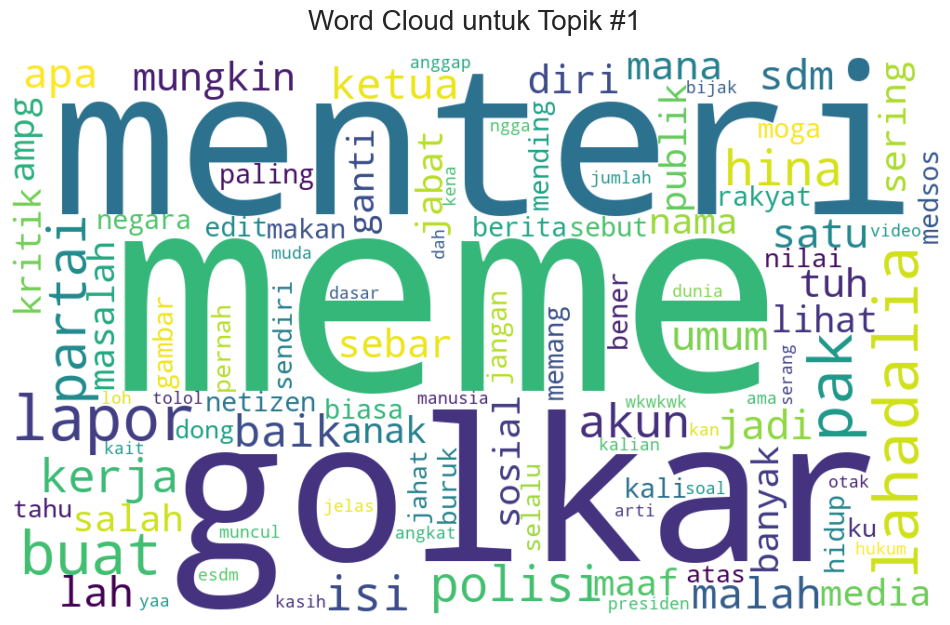

Plot disimpan ke: Topik_2_wordcloud.png


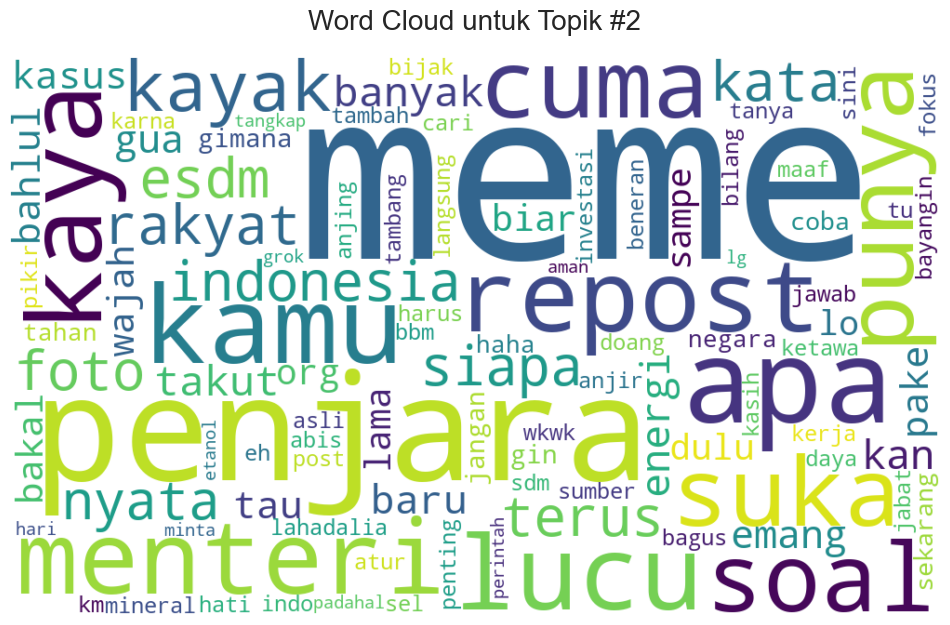

Plot disimpan ke: Topik_3_wordcloud.png


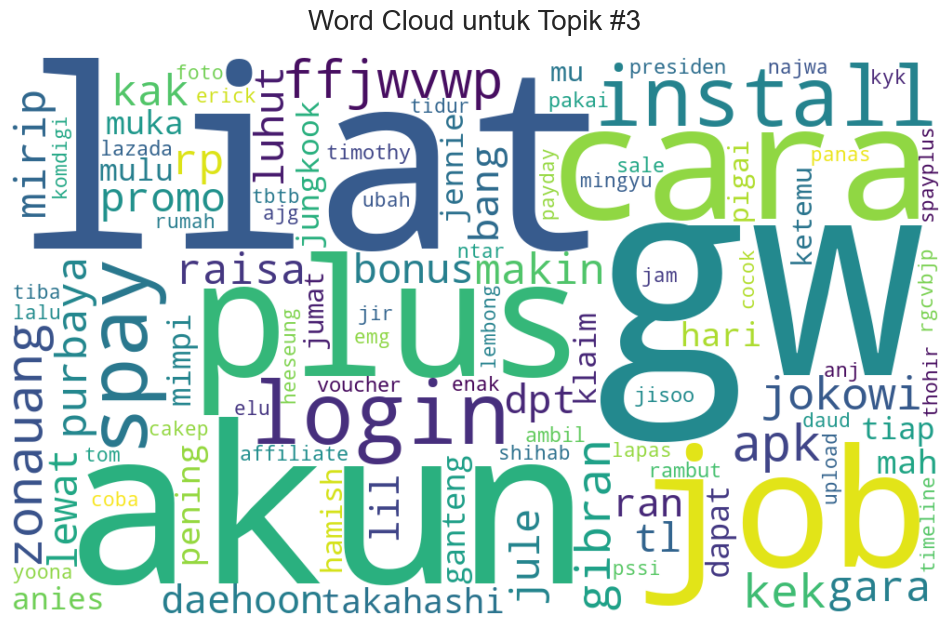

In [70]:
# Ambil komponen (distribusi kata per topik)
components = lda_model.components_

# Loop untuk setiap topik
for index_topik, dist_kata in enumerate(components):

    # --- Persiapan Frekuensi ---
    # Buat dictionary: {kata: bobot}
    # Ini diperlukan oleh 'generate_from_frequencies'
    # Kita gunakan SEMUA kata dan bobotnya, tidak hanya top N

    frequencies = {nama_fitur[i]: dist_kata[i] for i in range(len(nama_fitur))}

    # Inisialisasi objek WordCloud
    wc = WordCloud(
        background_color='white',
        width=1000,
        height=600,
        max_words=100 # Batasi jumlah kata agar tidak terlalu padat
    )

    # Hasilkan awan kata dari frekuensi (bobot)
    wc.generate_from_frequencies(frequencies)

    # --- Plotting ---
    plt.figure(figsize=(12, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off') # Hapus sumbu X dan Y
    plt.title(f'Word Cloud untuk Topik #{index_topik + 1}', fontsize=20, pad=20)

   # Simpan ke file
    nama_file_plot = f'Topik_{index_topik + 1}_wordcloud.png'
    plt.savefig(nama_file_plot, bbox_inches='tight')
    print(f"Plot disimpan ke: {nama_file_plot}")

    plt.show() # <-- INI NYALA (AKTIFKAN)

plt.close('all') # Tutup semua plot